In [2]:
!pip install matplotlib

  Using cached matplotlib-3.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.9 MB)
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached Pillow-9.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached kiwisolver-1.4.2-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
You should consider upgrading via the '/home/manos/notebook/jupyterenv/bin/python -m pip install --upgrade pip' command.


In [37]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:00:010m
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [6]:
!pip install networkx

  Using cached networkx-2.8.2-py3-none-any.whl (2.0 MB)


In [8]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:01


In [10]:
!pip install pandas

  Using cached pandas-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


In [38]:
!pip install sklearn

In [55]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn import *

In [12]:
G=nx.read_edgelist('data/facebook_combined.txt',nodetype=int)

In [13]:
%store G

Stored 'G' (Graph)


In [4]:
%store -r G

In [5]:
def select_random_edges(edge_list,n):
    random_edges = []
    counter = 0
    edge_list_length = len(edge_list)
    while True:
        index = random.randint(0,edge_list_length)
        selected_edge = edge_list[index]
        if selected_edge in set(random_edges):
            continue
        random_edges.append(selected_edge)
        if counter == n:
            return random_edges
        counter += 1

In [6]:
G_co=nx.complement(G)
co_edges=G_co.edges
G_co=nx.Graph()
G_co.add_edges_from(select_random_edges(list(co_edges),len(list(G.edges))-1))
print(len(list(G_co.edges))==len(list(G.edges)))
%store G_co

True
Stored 'G_co' (Graph)


In [7]:
clustering_pair={}
for node in list(G.nodes):
    clustering_pair[node]=nx.clustering(G,node)

def create_attribute(name,nxfunction,Graph):
    work=True
    if name in ["common_neighbors","Clustering Coefficient"]:
        work=False
    dict_name={}
    for u,v in Graph.edges:
        metric=nxfunction(Graph,[(u,v)])
        for_loop(dict_name,u,v,metric,work)
    nx.set_edge_attributes(Graph,dict_name,name)

def common_neighbors(Graph,list_par):
    return len(list(nx.common_neighbors(Graph,list_par[0][0],list_par[0][1])))
    
def clustering_coefficient_pair(Graph,list_par):
    return clustering_pair[list_par[0][0]]*clustering_pair[list_par[0][1]]

In [8]:
names=["common_neighbors","jaccard's coefficient","Resource allocation","Adamic/Adar","Preferential Attachment",
      "Clustering Coefficient"]
functions=[common_neighbors,nx.jaccard_coefficient,nx.resource_allocation_index,nx.adamic_adar_index,
          nx.preferential_attachment,clustering_coefficient_pair]
metrics= {names[i]: functions[i] for i in range(len(functions))}
#for i in range(len(functions)):
    #create_attribute(names[i],functions[i],G)

In [9]:
def create_dict_attribute(name,Graph):
    create_attribute(name,metrics[name],Graph)
    #%store G

In [10]:
#create_dict_attribute("common_neighbors")
#create_dict_attribute("jaccard's coefficient")
Graphs=[G,G_co]
for Graph in Graphs:
    for name in names[0:len(functions)]:
        
        def for_loop(dictionary,key1,key2,iterated_object,work=True):
            if work:
                for u,v,p in iterated_object:
                    dictionary[key1,key2]=round(p,8)
            else:
                dictionary[key1,key2]=iterated_object
                
        create_dict_attribute(name,Graph)
        print("-"*25)
    print("-"*50)
%store G
%store G_co

-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
--------------------------------------------------
-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
--------------------------------------------------
Stored 'G' (Graph)
Stored 'G_co' (Graph)


In [12]:
def add_link_existance(Graph,value):
    nodes=list(Graph.nodes)
    link_existance={}
    for u,v in Graph.edges:
        link_existance[u,v]=value
    nx.set_edge_attributes(Graph,link_existance,"link_existance")
    
Graphs=[G_co,G]
for i in range(2):
    add_link_existance(Graphs[i],i)
%store G
%store G_co

Stored 'G' (Graph)
Stored 'G_co' (Graph)


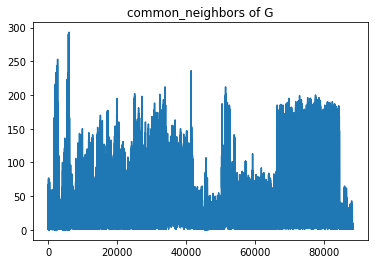

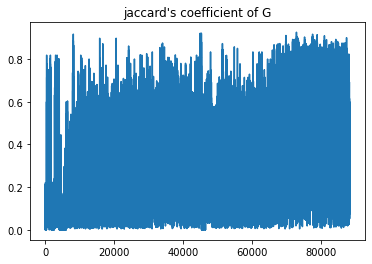

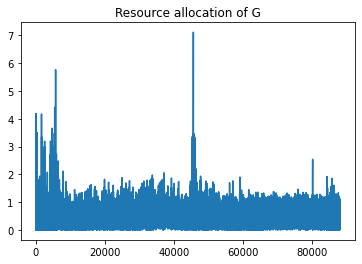

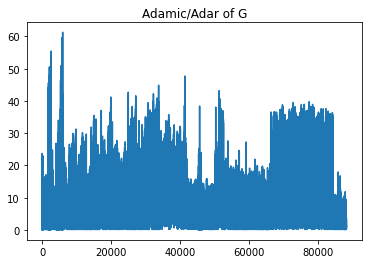

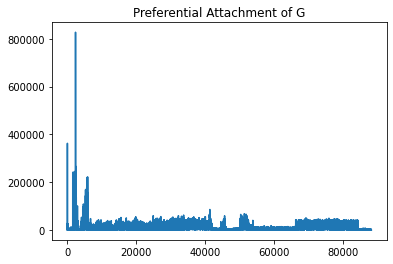

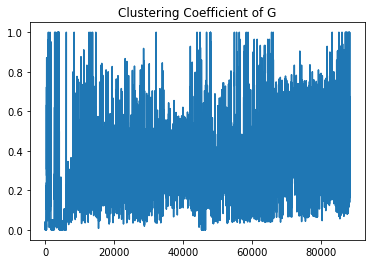

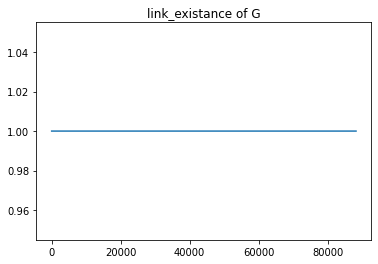

-----


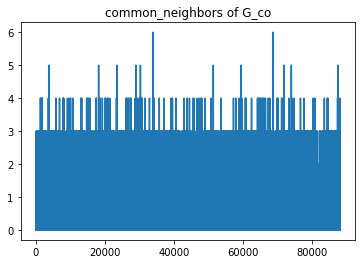

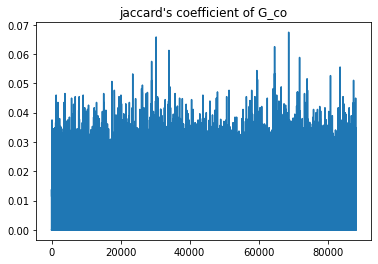

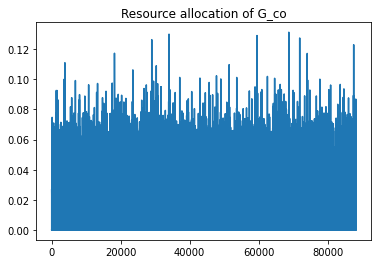

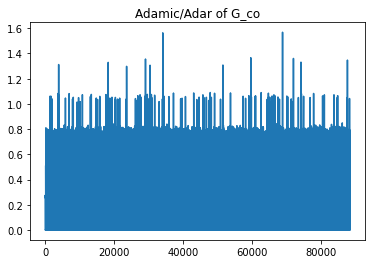

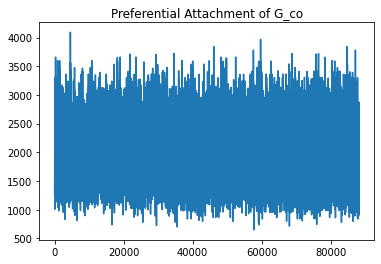

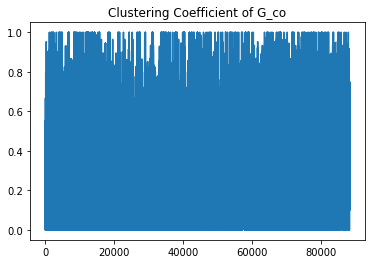

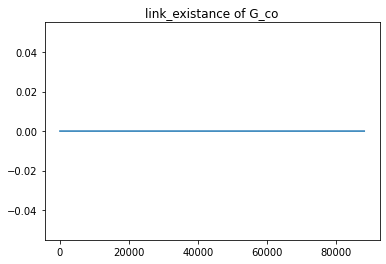

In [15]:
Graphs=[G,G_co]
Graph_names=["G","G_co"]
for i in range(2):
    if i==1:
         print("-"*5)
    for name in names[0:len(functions)]+["link_existance"]:
        plt.title(name+" of "+Graph_names[i])
        plt.plot(range(len(nx.get_edge_attributes(Graphs[i],name).keys())),
                 nx.get_edge_attributes(Graphs[i],name).values())
        plt.show()

In [32]:
def dataGraph(Graph):
    return nx.to_pandas_edgelist(Graph,nodelist=list(Graph.nodes))
data=pd.concat([dataGraph(G),dataGraph(G_co)])
%store data

Stored 'data' (DataFrame)


In [33]:
%store -r data

In [34]:
print(data.shape[0])

176468


In [70]:
def mydata_train(value,data):
    train_data=data.loc[data['link_existance']==value]
    return train_data.loc[data['link_existance']==value].head(int(0.8*train_data.shape[0]))

def mydata_test(data,train_data):
    return data[~data.isin(train_data)].dropna()

In [71]:
data_shuffled=utils.shuffle(data)

data_shuffled["key"]=[str(sublist[0])+" "+str(sublist[1])for sublist in 
                      zip(data_shuffled["source"], data_shuffled["target"])]

#str(data_shuffled["source"])+str(data_shuffled["target"])

data_shuffled.set_index("key",inplace=True)

print(data_shuffled[data_shuffled.index.duplicated()])

train_data=pd.concat([mydata_train(0,data_shuffled),mydata_train(1,data_shuffled)])
    
test_data=mydata_test(data_shuffled,train_data)


Empty DataFrame
Columns: [source, target, jaccard's coefficient, Resource allocation, Clustering Coefficient, Adamic/Adar, common_neighbors, Preferential Attachment, link_existance]
Index: []
